In [1]:
import pandas as pd

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sn
%matplotlib inline

In [3]:
df = pd.read_csv('weather_2.csv')

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [7]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [8]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,37.774534,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,37.774534,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,37.774534,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,37.774534,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,37.774534,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,37.774534,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,37.774534,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,12.085333,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,37.774534,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,12.085333,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,37.774534,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1 = df.fillna(df.mean(), inplace=True) 

In [10]:
df1.head()

AttributeError: 'NoneType' object has no attribute 'head'

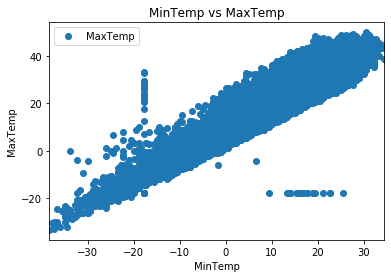

In [10]:
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

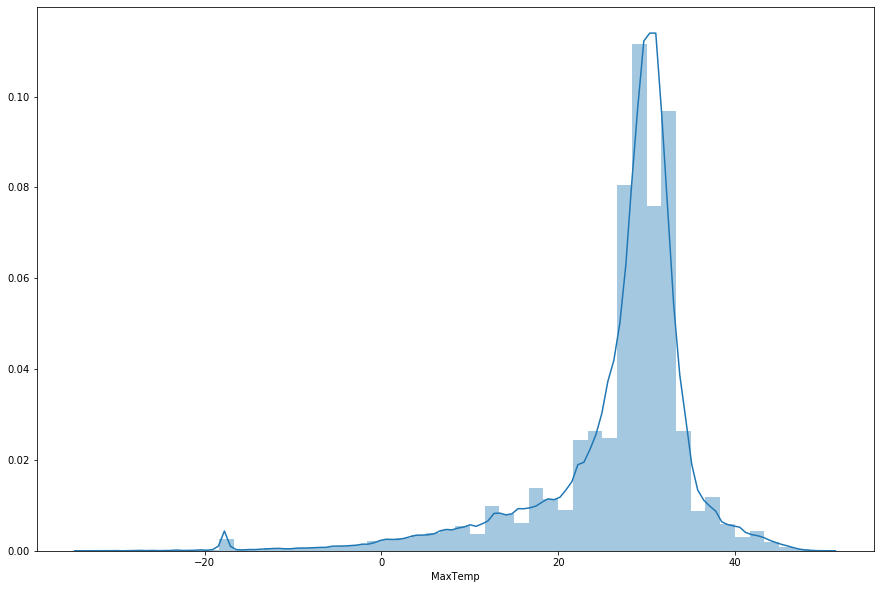

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(df['MaxTemp'])

In [12]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [14]:
clf = LinearRegression()  
clf.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
clf.intercept_

array([10.68203508])

In [16]:
clf.coef_

array([[0.91941073]])

In [17]:
y_pred = clf.predict(X_test)

In [18]:
clf.score(X_test,y_test)

0.7732827838844385

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,31.111111,30.091817
1,3.333333,6.595765
2,28.888889,31.113385
3,17.222222,13.746737
4,30.000000,32.645736
...,...,...
23803,27.777778,31.624168
23804,32.222222,32.134952
23805,32.222222,32.645736
23806,31.666667,32.134952


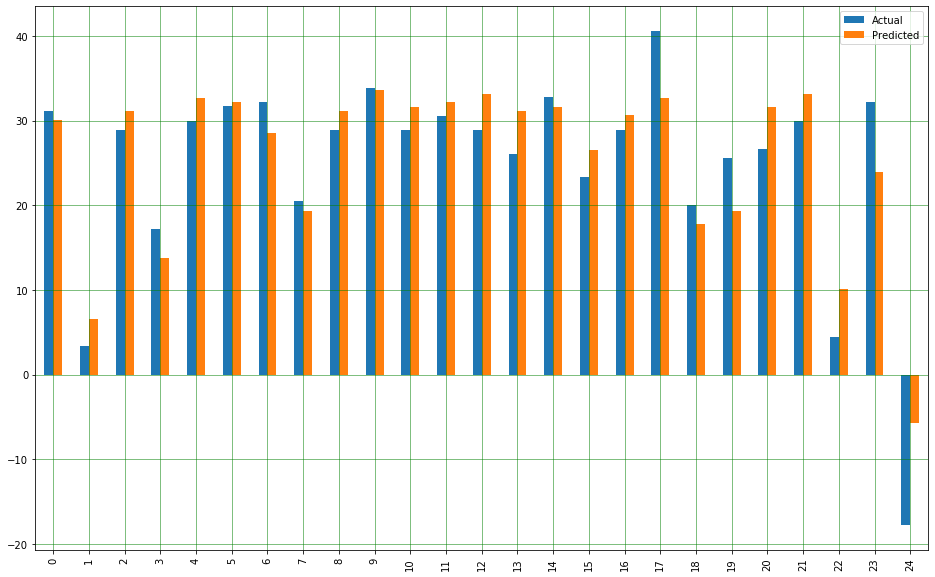

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

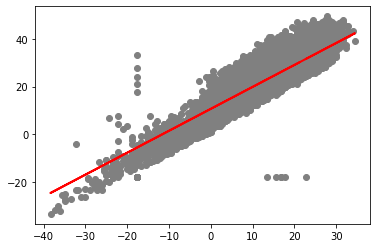

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1683640442728374
Mean Squared Error: 17.271074869973173
Root Mean Squared Error: 4.155848273213686


In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'radom_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'Gaussian_nb' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'multinominal_nb' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
        }
    },
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {}
    }
}

In [29]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],cv=5,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

c:\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown la

ValueError: Unknown label type: 'continuous'